In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# P(X=1)=p
# n=number of runs

def SRW(X0, p, n):
    probs = np.random.uniform(0,1,n)
    RWprobs = pd.Series(probs)
    bools = RWprobs > p
    RWIncrements = bools.replace([True, False], [1, -1])
    RWIncrements.loc[0] = X0
    RW = RWIncrements.cumsum()
    return RW

In [9]:


def RelocatedSRW(X0, p, T):
    R = SRW(X0, p, T[0])
    rel = np.random.randint(0,T[0]-1)
    S = T[0]
    for i in range(1,len(T)):
        nextR = SRW(R[rel], p, T[i])
        R = pd.concat([R, nextR], ignore_index=True)
        S += T[i]
        rel = np.random.randint(0, S-1)
    return R

In [14]:
z = np.random.default_rng().geometric(p=0.00001, size=1000)
Sim1 = RelocatedSRW(0, 0.5, z)
Sim2 = SRW(0,0.5, z.sum())

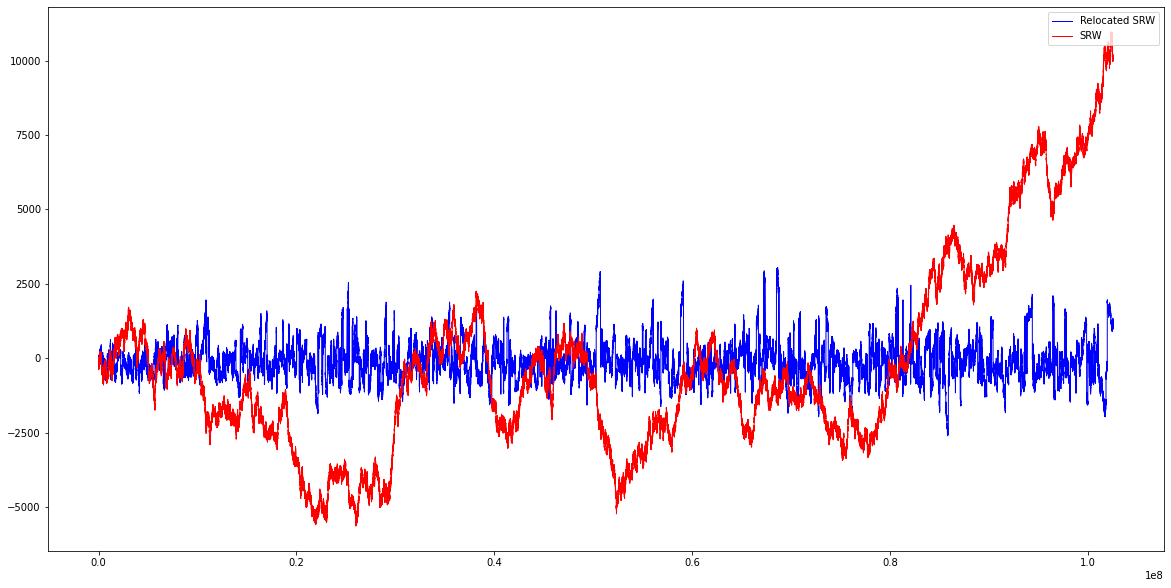

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(Sim1, linewidth=1, color='b', label='Relocated SRW')
ax.plot(Sim2, linewidth=1, color='r', label='SRW')
ax.legend(loc="upper right")


plt.show()